<a href="https://colab.research.google.com/github/bruce123210/python-AI-pratice/blob/main/mnist_pratice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.mnist import load_data  #手寫數字資料集
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5


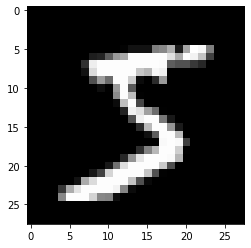

In [ ]:
import matplotlib.pyplot as plt #show出來的套件
print(y_train[0])  #答案
# cmap="YlGn_r"  _r:顏色相反
plt.imshow(x_train[0], cmap="gray")  #資料集的第一個圖  cmap:選顏色

In [ ]:
# import pandas as pd
# pd.DataFrame(x_train[0])

In [ ]:
from tensorflow.keras.models import Sequential  #序列式 往上一直疊 較拘謹
from tensorflow.keras.layers import Dense

layers = [
    # 784 * 128(線條) + 128(bias) = 100480    #unit=幾個神經元 爽就好 老師經驗784->1000->去一位數:100->2的次方128
    Dense(128, activation="relu", input_dim=784),   #dence全連階層  dim:dimentioin
    # 128 * 10(線條) + 10(bias) = 1290
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()
#parameter:需要調整的參數
#bias: 一個activation會配上一個bias

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# mse坡度在你預測很差的時候太小, cross entropy坡度好多了
# 二元(sigmoid): Binary Cross Entropy  p log (1/q) + (1-p) log (1/1-q)
# 多元(softmax): Categorical Cross Entropy  pi(1/qi)
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=["accuracy"])#額外的度量標準:準確度


In [ ]:
# 資料預處理
# 答案: [0, 5, 2, 3....]
from tensorflow.keras.utils import to_categorical    #做one_hot
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# 圖片: [[255, 0, 255, 128]]
# 28 * 28 -> 784
x_train_norm = x_train.reshape(60000, 784) / 255    # normalize常態化:展開:60000筆不變 28*28(2維)變1維=784 再 除255 圖片輸入範圍要跟隨積係數搭配到 到0-1or-1-1到0-1 or -1-1(tensorflow規定)
x_test_norm = x_test.reshape(10000, 784) / 255
print(x_train_norm[0])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# validation_split: 切出一些驗證資料來做驗證(0.1: 54000筆資料訓練)
# epochs: 看幾輪(10輪: 54000 * 10)
# batch_size: 看了多少筆再做一次梯度調整(看圖片大小, 圖片小:200, 圖片大:20)
# 200batch, 10epoch: 54000 * 10 / 200 -> 2700(梯度調整)
# verbose: 0(無聲) 1(最詳細) 2(沒有進度條)
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True), #5次沒比較好就停， 並回去最佳值
    ModelCheckpoint("mlp.h5", save_best_only=True)    #儲存最佳值
]
model.fit(x_train_norm,
          y_train_cat,
          validation_split=0.1,
          epochs=100,
          batch_size=200,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100
270/270 - 2s - loss: 0.4327 - accuracy: 0.8807 - val_loss: 0.1991 - val_accuracy: 0.9467
Epoch 2/100
270/270 - 1s - loss: 0.2041 - accuracy: 0.9420 - val_loss: 0.1412 - val_accuracy: 0.9617
Epoch 3/100
270/270 - 1s - loss: 0.1499 - accuracy: 0.9568 - val_loss: 0.1148 - val_accuracy: 0.9677
Epoch 4/100
270/270 - 1s - loss: 0.1183 - accuracy: 0.9657 - val_loss: 0.1017 - val_accuracy: 0.9715
Epoch 5/100
270/270 - 1s - loss: 0.0956 - accuracy: 0.9729 - val_loss: 0.0898 - val_accuracy: 0.9750
Epoch 6/100
270/270 - 1s - loss: 0.0804 - accuracy: 0.9770 - val_loss: 0.0872 - val_accuracy: 0.9762
Epoch 7/100
270/270 - 1s - loss: 0.0678 - accuracy: 0.9810 - val_loss: 0.0845 - val_accuracy: 0.9760
Epoch 8/100
270/270 - 1s - loss: 0.0584 - accuracy: 0.9837 - val_loss: 0.0845 - val_accuracy: 0.9758
Epoch 9/100
270/270 - 1s - loss: 0.0507 - accuracy: 0.9859 - val_loss: 0.0782 - val_accuracy: 0.9770
Epoch 10/100
270/270 - 1s - loss: 0.0444 - accuracy: 0.9878 - val_loss: 0.0723 - val_accura

In [ ]:
model.evaluate(x_test_norm, y_test_cat)      #evaluate評估成效  回去條神經元參數

313/313 [==============================] - 1s 2ms/step - loss: 0.0723 - accuracy: 0.9788


[0.07226242870092392, 0.9787999987602234]

In [ ]:
from sklearn.metrics import confusion_matrix
# predict_proba -> predict
# predict -> predict_classes
# 只要在tensorflow: 就帶one-hot y_test_cat
# 不在: 帶原本 y_test
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat, 
             columns=["{}(預測)".format(i) for i in range(10)],
             index=["{}(正確)".format(i) for i in range(10)],)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),971,0,0,2,0,0,1,0,4,2
1(正確),0,1125,2,3,0,1,2,0,2,0
2(正確),5,1,1005,3,2,0,3,7,5,1
3(正確),2,0,0,994,0,0,0,4,5,5
4(正確),2,0,3,0,964,0,3,2,1,7
5(正確),2,0,0,11,1,864,6,1,5,2
6(正確),5,3,0,1,6,4,937,1,1,0
7(正確),1,5,6,3,0,0,0,1008,1,4
8(正確),4,0,6,5,1,2,2,3,946,5
9(正確),2,5,0,6,9,4,0,4,5,974


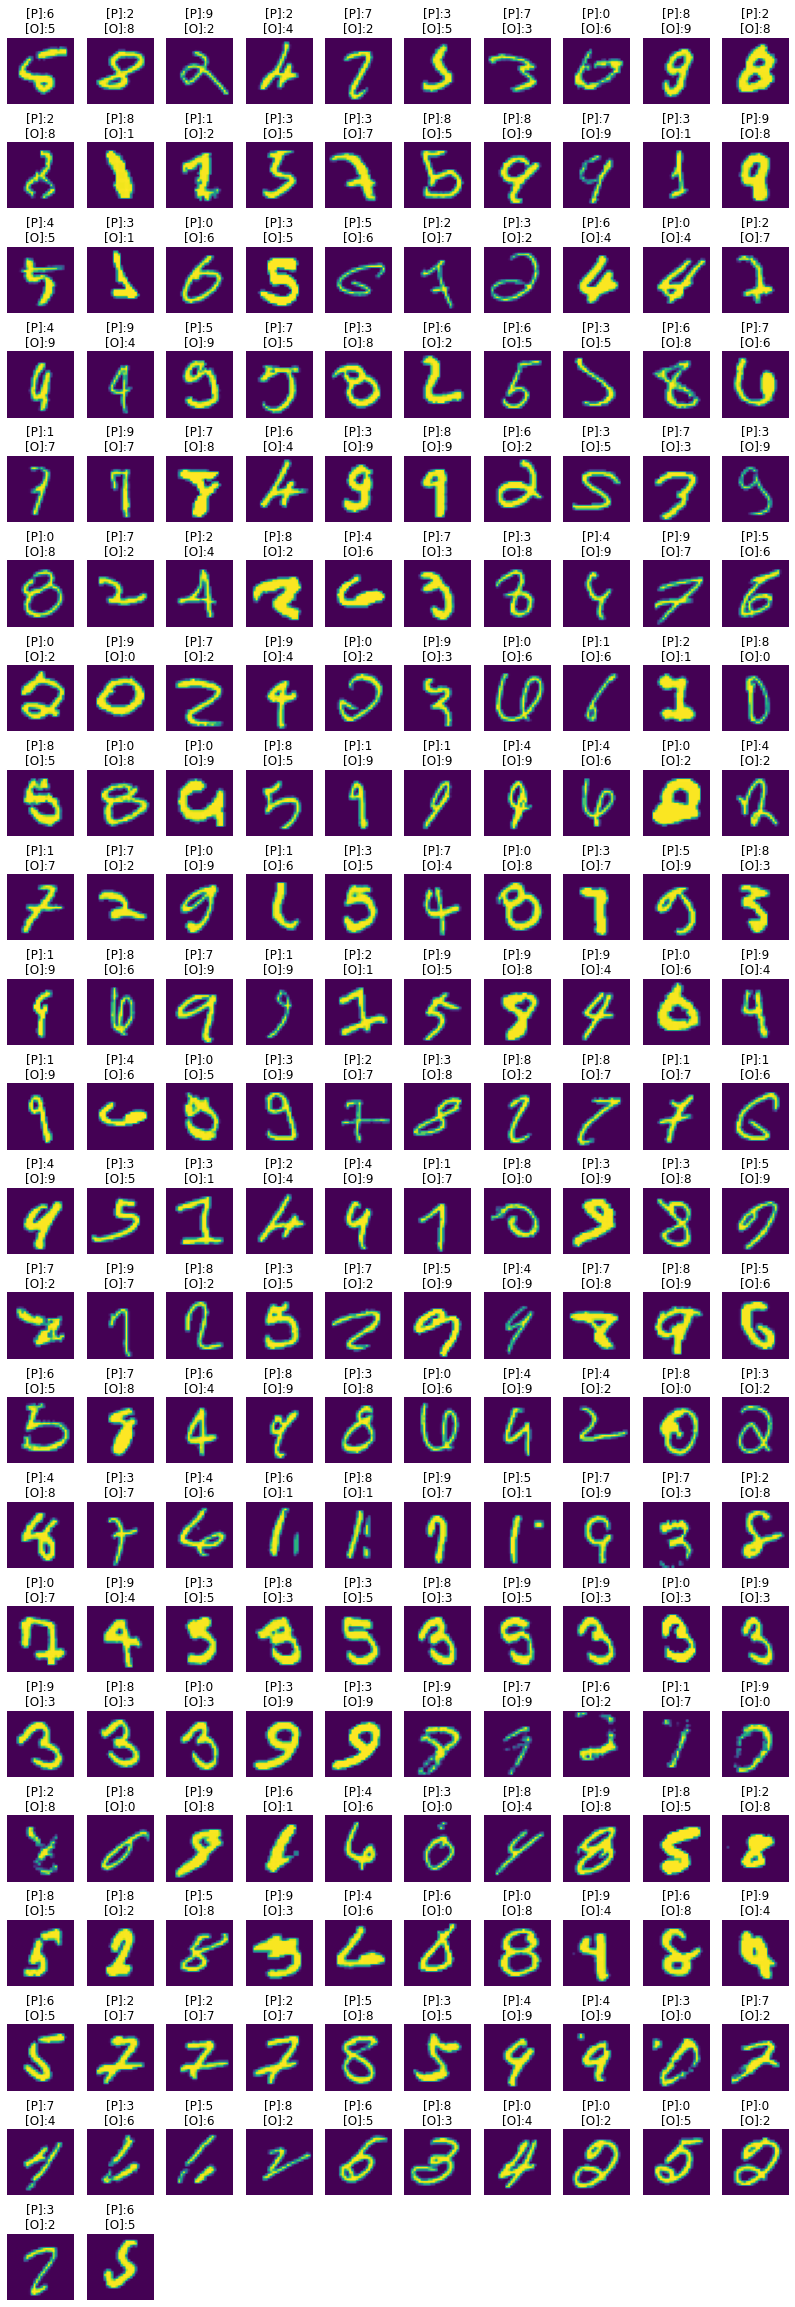

In [ ]:
import numpy as np
idx = np.nonzero(pre != y_test)[0]
# np.nonzero([[0, 2, 0], [0, 0, 3]])
false_pre = pre[idx]
false_label = y_test[idx]
false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[P]:{}\n[O]:{}".format(false_pre[i], false_label[i])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])

In [ ]:
import os
from tensorflow.keras.models import load_model
if not os.path.exists("mlp.h5"):
  layers=[
  Dense(128, activation="relu", input_dim=784),
  Dense(10, activatoin="softmax")        
  ]
  model = Sequential(layers)
  model.compile(loss=CategoricalCrossentropy(),
        optimizer=Adam(),
        metrics=["accuracy"])
else:
  print("loading.....")
  model=load_model("mlp.h5")
model.summary()




loading.....
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
